<a href="https://colab.research.google.com/github/Maks6666/ML/blob/main/pytorch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ваша задача методом градієнтного спуску знайти коефіцієнти для задачі регресії. Обираємо метод лінійної регресії та дані про діаманти

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/diamonds.csv",
                 index_col=0)

df.head()

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335


In [11]:
# імпорт модуля
import torch
import numpy as np
from torch.optim import SGD


device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)



# створіть тензори без градієнтів


y = torch.tensor(np.array(df["price"]), requires_grad=False)
x = torch.tensor(np.array(df["carat"]), requires_grad=False)

# створіть тензори з градієнтом, оберіть довільне початкове значення
coef = torch.tensor(-2.0, requires_grad=True)
intercept = torch.tensor(2.0, requires_grad=True)

# вкажіть навчальний крок

optimizer = SGD([coef, intercept], lr=1e-1)


# визначення алгоритму

def function(x):
  return coef * x + intercept


# # основний цикл
for t in range(2000):
  y_pred = function(x)

    # обрахуйте метрику середньо квадратичного
  loss = torch.mean((y_pred - y) ** 2)

    # обрахуйте градієнти по метриці
  loss.backward()

  if t % 100 == 0:  # виведіть значення метрики для кожного сотого кроку
      print(f"Iteration {t}: Loss = {loss.item()}")

    # градієнтний спуск
  optimizer.step()
  optimizer.zero_grad()



  # обрахуйте прогноз моделі за формулою лінійної регресії

  # обрахуйте метрику середньо квадратичного
  # не використовуйте sklearn, лише функції torch
  # див torch.mean

  # виведіть значення метрики для кожного сотого кроку

  # обрахуйте градієнти по метриці

  # градієнтний спуск



Iteration 0: Loss = 31386041.35950721
Iteration 100: Loss = 2433385.681302605
Iteration 200: Loss = 2398139.375379753
Iteration 300: Loss = 2397956.0088853594
Iteration 400: Loss = 2397955.054996759
Iteration 500: Loss = 2397955.0500402357
Iteration 600: Loss = 2397955.050022953
Iteration 700: Loss = 2397955.050022953
Iteration 800: Loss = 2397955.050022953
Iteration 900: Loss = 2397955.050022953
Iteration 1000: Loss = 2397955.050022953
Iteration 1100: Loss = 2397955.050022953
Iteration 1200: Loss = 2397955.050022953
Iteration 1300: Loss = 2397955.050022953
Iteration 1400: Loss = 2397955.050022953
Iteration 1500: Loss = 2397955.050022953
Iteration 1600: Loss = 2397955.050022953
Iteration 1700: Loss = 2397955.050022953
Iteration 1800: Loss = 2397955.050022953
Iteration 1900: Loss = 2397955.050022953


RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

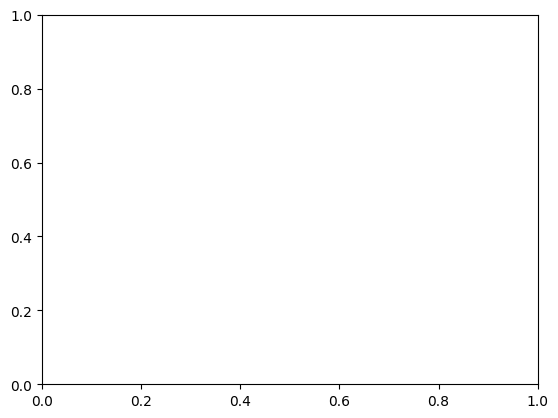

In [13]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)

plt.plot(xs.cpu(), function(xs).cpu(), label='f(x)')

plt.scatter(x.item(), function(x).item(), c='red', label='min')
plt.legend()

In [15]:
x

tensor([0.2300, 0.2100, 0.2300,  ..., 0.7000, 0.8600, 0.7500], device='cuda:0',
       dtype=torch.float64)

# Результат

In [31]:
coef.item(), intercept.item()

(7756.4189453125, -2256.354736328125)

# Порівняйте результат з sklearn

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X_train = df.drop(columns=['price'])
y_train = df['price']
# тренування
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_[0], model.intercept_

(7756.425617968435, -2256.360580045403)

In [ ]:
# Градієнтний спуск: (7756.4189453125, -2256.354736328125)

# Лінійна регресія: (7756.425617968435, -2256.360580045403)

# Висновок: коефіцієнти практично однакові